In [61]:
import pandas as pd
import numpy as np
import os
path = "C:/Users/joans/Documents/Joan the software engr/4_term/Supervised Learning/Assignments (local)/Assignment3/breast_cancer.csv"
data_joan = pd.read_csv(path, sep = ',')


In [62]:
#checking the name of the columns, data type, and missing data for each column
data_joan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   Marg       699 non-null    int64 
 5   Epith      699 non-null    int64 
 6   bare       699 non-null    object
 7   b1         699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   Mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


all columns have int64 type aside from the bare column which is an object type. let's check the first 3 data entries so we can see what does the bare column holds... 


In [63]:
print(data_joan.head(10))

        ID  thickness  size  shape  Marg  Epith bare  b1  nucleoli  Mitoses  \
0  1000025          5     1      1     1      2    1   3         1        1   
1  1002945          5     4      4     5      7   10   3         2        1   
2  1015425          3     1      1     1      2    2   3         1        1   
3  1016277          6     8      8     1      3    4   3         7        1   
4  1017023          4     1      1     3      2    1   3         1        1   
5  1017122          8    10     10     8      7   10   9         7        1   
6  1018099          1     1      1     1      2   10   3         1        1   
7  1018561          2     1      2     1      2    1   3         1        1   
8  1033078          2     1      1     1      2    1   1         1        5   
9  1033078          4     2      1     1      2    1   2         1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  
5      4  
6      2  
7      2  
8      2  
9      2  


the first 10 values of bare column are ranging from 1-10, it must be an int type. so we must change it.

In [64]:
data_joan.describe()

,ID,thickness,size,shape,Marg,Epith,b1,nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


all of the columns have 699 entries each, which means there are no null values.
for the id column - the mean and std values are realy high, which could mean that the id are very large, maybe sequential number and unique.
all other columns have a min value of 1 and max value of 10- which suggests that the data is normalized.

the class could be our target variable.

In [65]:
data_joan['bare'] = pd.to_numeric(data_joan['bare'].replace('?', np.nan), errors='coerce')
data_joan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   Marg       699 non-null    int64  
 5   Epith      699 non-null    int64  
 6   bare       683 non-null    float64
 7   b1         699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   Mitoses    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


We converted the bare column to float datatype per instruction. using info() method, we see that there are only 683 non-null values. it should be 699.

per instruction, we have to fill the missing values with median values

In [66]:
median_value = data_joan['bare'].median()
data_joan['bare'].fillna(median_value, inplace=True)

data_joan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   Marg       699 non-null    int64  
 5   Epith      699 non-null    int64  
 6   bare       699 non-null    float64
 7   b1         699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   Mitoses    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


now, the bare column has 699 non-null and float64 data type.


we have to drop the ID column, since it is a unique identifier and will not help with our model

In [67]:
data_joan = data_joan.drop('ID', axis= 1)
data_joan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   thickness  699 non-null    int64  
 1   size       699 non-null    int64  
 2   shape      699 non-null    int64  
 3   Marg       699 non-null    int64  
 4   Epith      699 non-null    int64  
 5   bare       699 non-null    float64
 6   b1         699 non-null    int64  
 7   nucleoli   699 non-null    int64  
 8   Mitoses    699 non-null    int64  
 9   class      699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's use the same sample_df for demonstration.
# Note: In a real scenario, you would use your full dataset.





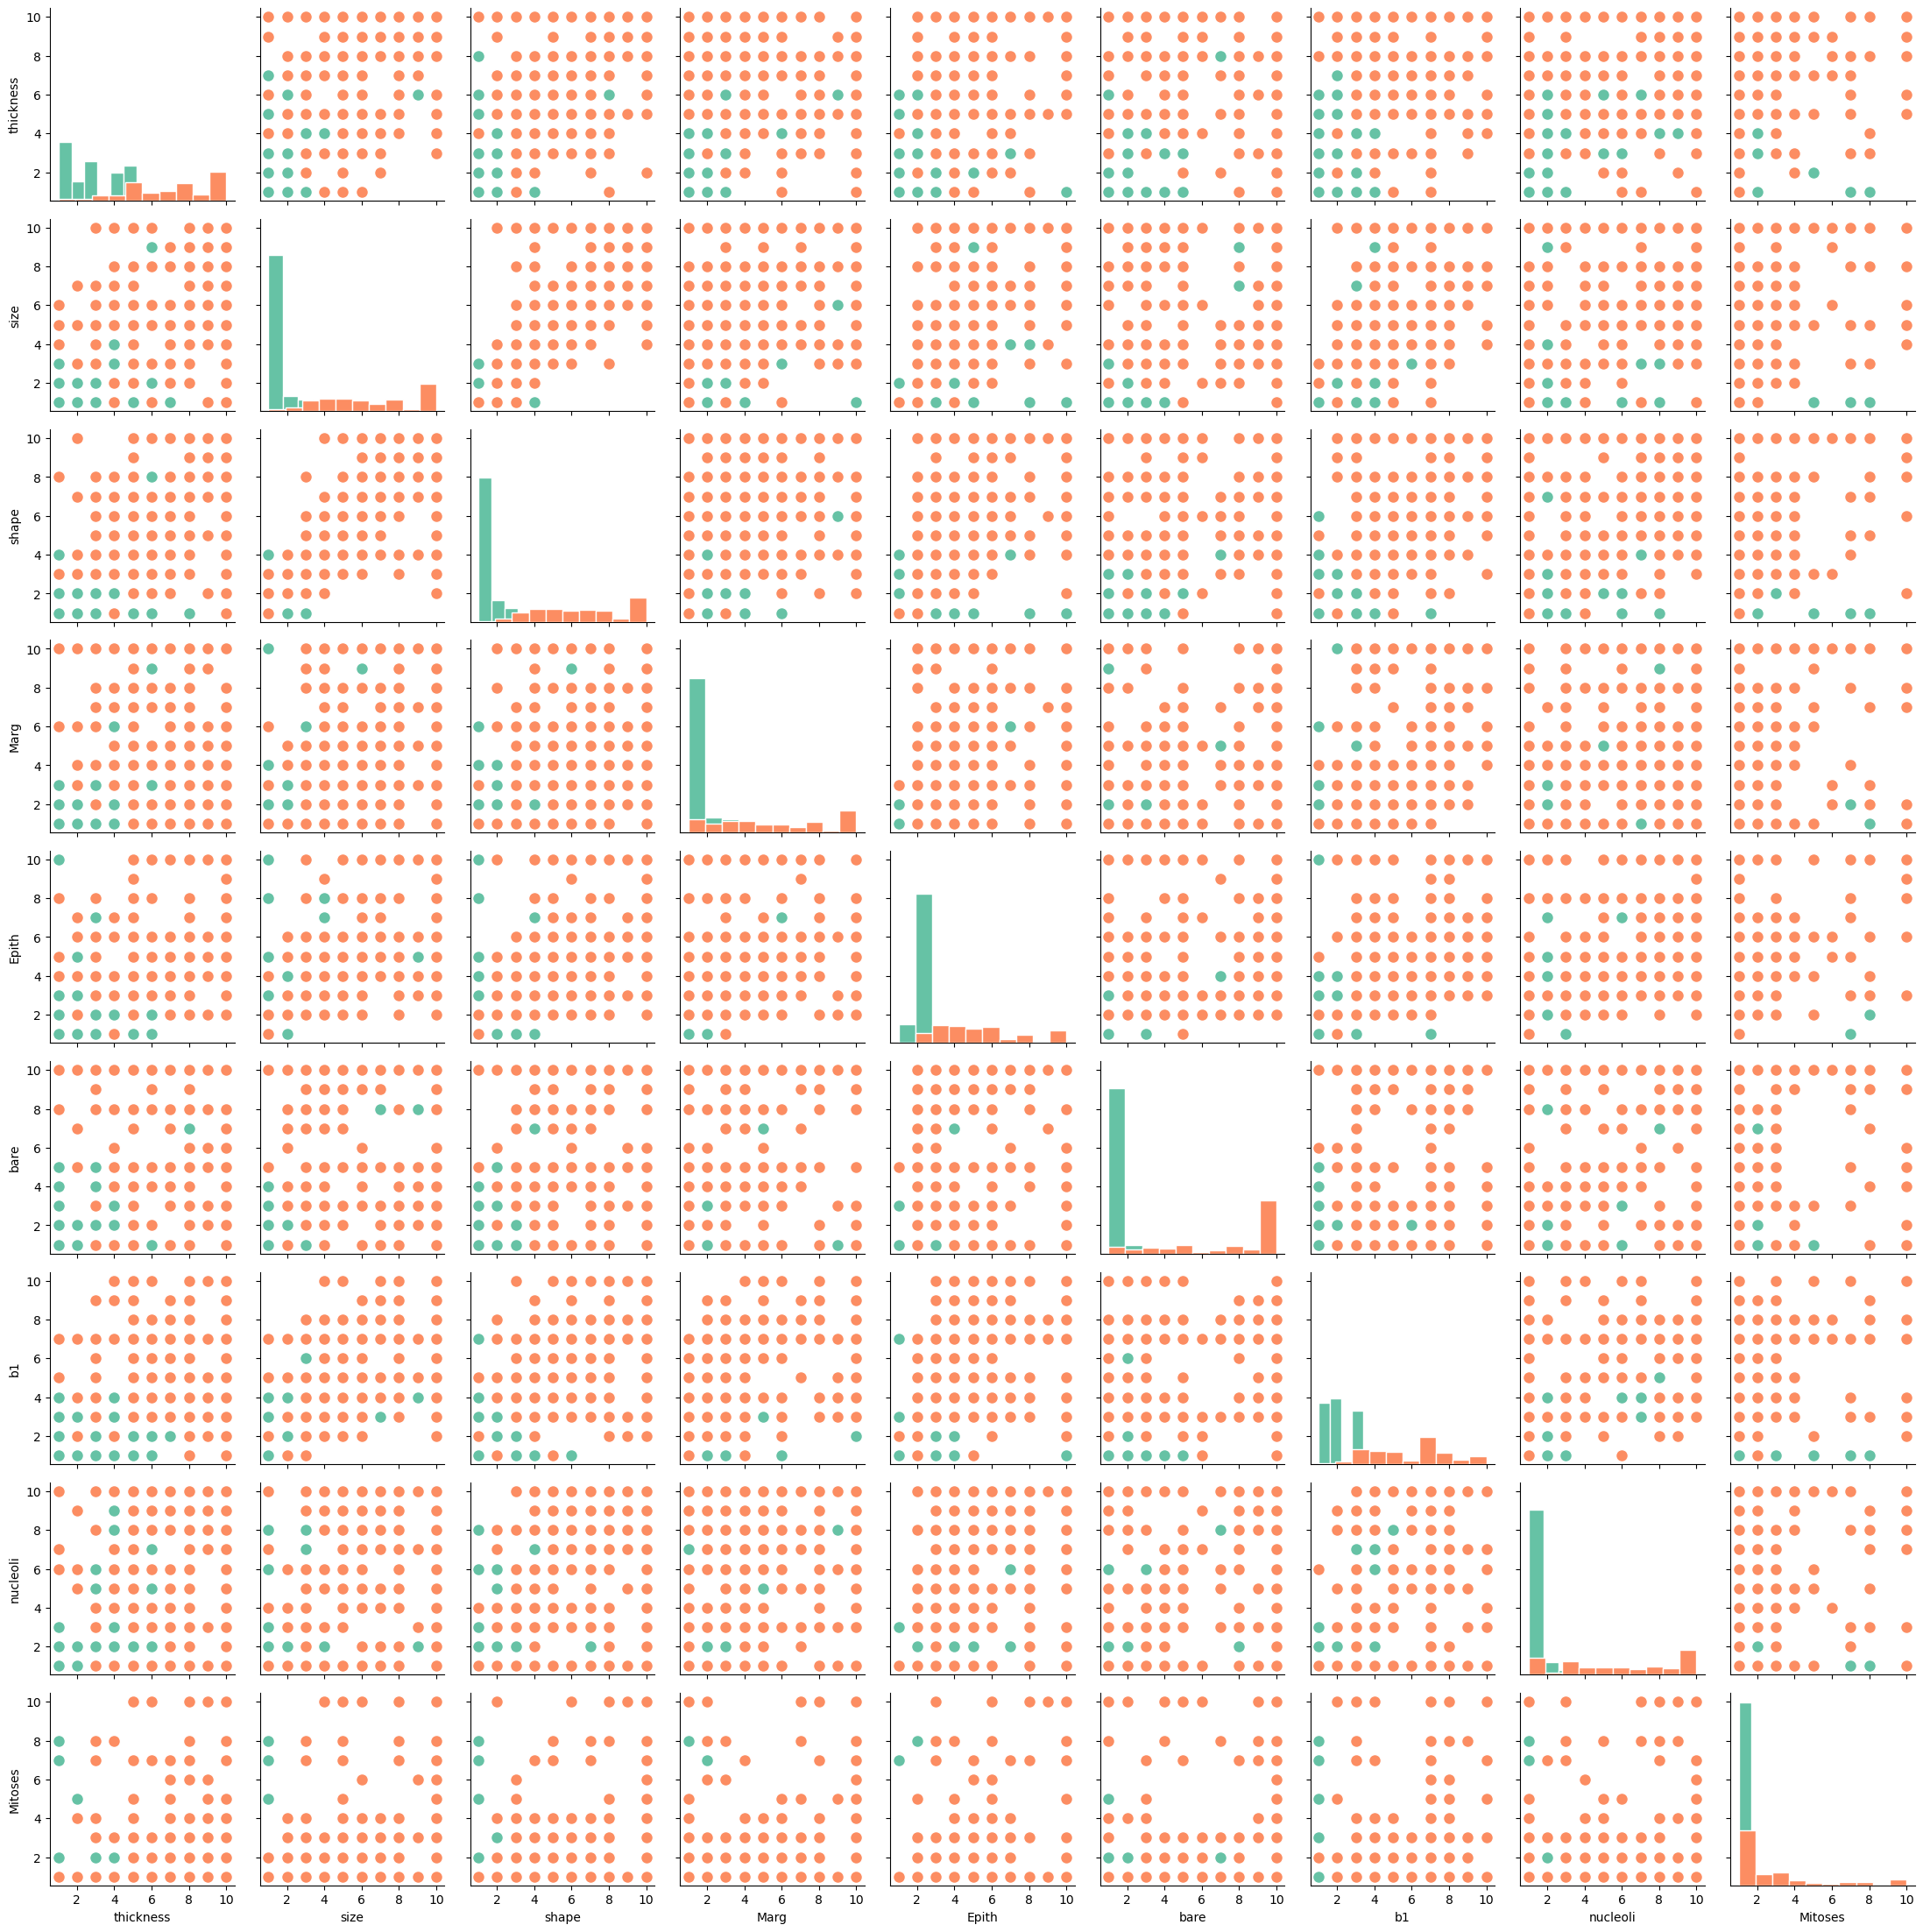

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(data_joan, hue="class", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=100)
plt.show()

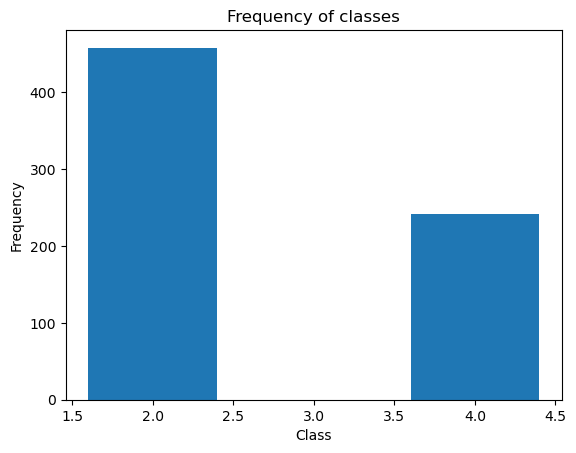

In [70]:
value_counts = data_joan['class'].value_counts()
plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of classes')
plt.show()


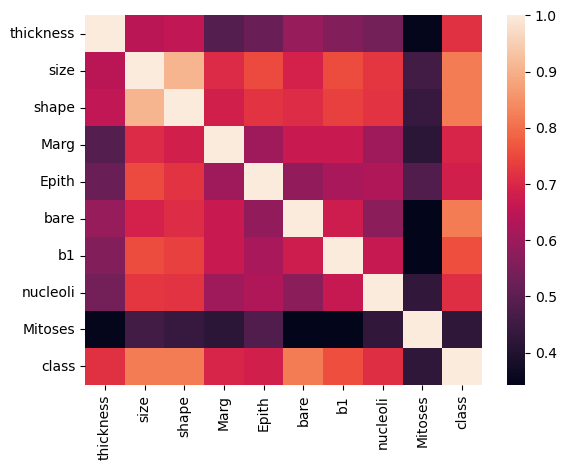

In [71]:
ax = sns.heatmap(data_joan.corr())

Looks like that the target feature is not balance.

In [72]:
#separating the features from the class

X = data_joan.drop(['class'], axis =1)
y = data_joan['class']

In [73]:
#8.	Split your data into train 80% train and 20% test, 
# use the last two digits of your student number for the seed. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 94)

In [74]:
##accuracy of testing set

# import SVC classifier
#Run SVM with default hyperparameter: Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

clf_linear_joan=SVC(kernel='sigmoid', C=1)

clf_linear_joan.fit(X_train, y_train)


# make predictions on test set
y_pred = clf_linear_joan.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=0.1 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=0.1 : 0.3929


In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

for i in kernel_list:
    if i == 'linear':
        c = 0.1
    else:
        c = 1.0 #default value
    
    #model accurace
    clf = SVC(kernel= i, C=c)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    #training set accuracy
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print(f'{i} kernel and C : {c}')
    print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

    

linear kernel and C : 0.1
Training set score: 0.9696
Test set score: 0.9786
Confusion Matrix:
 [[97  2]
 [ 1 40]]


rbf kernel and C : 1.0
Training set score: 0.9750
Test set score: 0.9786
Confusion Matrix:
 [[96  3]
 [ 0 41]]


poly kernel and C : 1.0
Training set score: 0.9821
Test set score: 0.9643
Confusion Matrix:
 [[96  3]
 [ 2 39]]


sigmoid kernel and C : 1.0
Training set score: 0.3953
Test set score: 0.3929
Confusion Matrix:
 [[55 44]
 [41  0]]




# Exercise 2


In [76]:
path = "C:/Users/joans/Documents/Joan the software engr/4_term/Supervised Learning/Assignments (local)/Assignment3/breast_cancer.csv"
data_joan_df2 = pd.read_csv(path, sep = ',')
data_joan_df2['bare'] = pd.to_numeric(data_joan['bare'].replace('?', np.nan), errors='coerce')

In [77]:
data_joan_df2 = data_joan_df2.drop('ID', axis= 1)


In [78]:

X = data_joan.drop(['class'], axis =1)
y = data_joan['class']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 94)

cols = X.columns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [80]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump

# Step 1: Load the data into a pandas dataframe
data_joan_df2 = pd.read_csv('C:/Users/joans/Documents/Joan the software engr/4_term/Supervised Learning/Assignments (local)/Assignment3/breast_cancer.csv')  

# Step 2: Replace '?' with np.nan in the 'bare' column and change the type to float
data_joan_df2['bare'] = pd.to_numeric(data_joan_df2['bare'], errors='coerce')

# Step 3: Drop the 'ID' column
data_joan_df2.drop(columns=['ID'], inplace=True)

# Step 4: Separate the features from the class
X = data_joan_df2.drop(columns=['class'])
y = data_joan_df2['class']

# Step 5: Split the data into train and test sets
# Use the last two digits of your student number as the random seed
random_seed = 94  # Replace 42 with the last two digits of your student number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Step 6: Define two transformer objects to transform the training data
# a. Fill missing values with the median
imputer = SimpleImputer(strategy='median')

# b. Scale the data
scaler = StandardScaler()

# Step 7: Combine the two transformers into a pipeline
num_pipe_joan = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# Step 8: Create a new Pipeline with two steps
# First step: num_pipe_joan
# Second step: SVM classifier
svm_classifier = SVC(random_state=random_seed)

pipe_svm_joan = Pipeline([
    ('preprocessing', num_pipe_joan),
    ('classifier', svm_classifier)
])

# Step 10: Define the grid search parameters
param_grid_svm = {
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
    'classifier__degree': [2, 3]
}

# Step 12: Create a grid search object
grid_search_joan = GridSearchCV(
    estimator=pipe_svm_joan,
    param_grid=param_grid_svm,
    scoring='accuracy',
    refit=True,
    verbose=3
)

# Step 14: Fit the training data to the grid search object
grid_search_joan.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=linear;, score=0.955 total time=   0.0s
[CV 4/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=linear;, score=0.991 total time=   0.0s
[CV 1/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END classifier__C=0.01, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=rbf;, score=0.

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('classifier', SVC(random_state=94))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__degree': [2, 3],
                         'classifier__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                         'classifier__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [81]:

# Step 15: Print out the best parameters
print("Best Parameters:", grid_search_joan.best_params_)

# Step 16: Print out the best estimator
print("Best Estimator:", grid_search_joan.best_estimator_)

# Step 17: Create an object that holds the best model
best_model_joan = grid_search_joan.best_estimator_

# Step 18: Fit the training data to the best model and print out the accuracy score
best_model_joan.fit(X_train, y_train)
y_pred = best_model_joan.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Step 19: Save the model using joblib
dump(best_model_joan, 'best_model_joan.joblib')

# Step 20: Save the full pipeline using joblib
dump(pipe_svm_joan, 'full_pipeline_joan.joblib')


Best Parameters: {'classifier__C': 0.1, 'classifier__degree': 2, 'classifier__gamma': 0.03, 'classifier__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 SVC(C=0.1, degree=2, gamma=0.03, random_state=94))])
Accuracy Score: 0.9714285714285714


['full_pipeline_joan.joblib']